In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs

In [10]:
hds = xr.open_zarr("/pscratch/sd/t/timothys/nested-eagle/v0/data/hrrr.analysis.training.zarr", decode_timedelta=True)
gds = xr.open_zarr("/pscratch/sd/t/timothys/nested-eagle/v1/data/gfs.analysis.training.zarr", decode_timedelta=True)

In [18]:
hds["gmean_residual_stdev"].values

array([1.27447436e-02, 0.00000000e+00, 4.19208513e+00, 0.00000000e+00,
       2.40046229e-01, 2.35192945e-01, 2.74661340e-01, 3.27205613e-01,
       3.60351474e-01, 3.81900019e-01, 3.88413753e-01, 4.11067906e-01,
       4.81425008e-01, 8.08928590e-01, 1.06422483e+00, 1.12055745e+00,
       4.34289867e+00, 2.18981289e-02, 1.24461628e-03, 2.65700244e+00,
       2.21336926e+00, 1.92916426e+00, 1.90798373e+00, 1.97977786e+00,
       1.98669722e+00, 1.84987586e+00, 1.67976091e+00, 1.55752612e+00,
       1.29500915e+00, 1.07941182e+00, 8.41915126e-01, 6.62065273e-01,
       1.27781919e-02, 0.00000000e+00, 4.19229190e+00, 0.00000000e+00,
       9.25286379e-02, 4.88279246e-01, 7.79341543e-01, 1.25950850e+00,
       9.23002531e-01, 6.31585405e-01, 5.81466587e-01, 5.80074143e-01,
       5.48600524e-01, 5.48036385e-01, 7.17054783e-01, 8.11439791e-01,
       9.50152592e-01, 1.20423391e+00, 1.72558352e+00, 7.10370874e-01,
       7.94691554e-01, 9.77747472e-01, 1.10845941e+00, 1.17112934e+00,
      

In [4]:
gds["data"].dtype

dtype('float32')

In [9]:
xr.DataArray(name="blah").astype(np.float32)

<xarray.DataArray 'blah' ()> Size: 4B
array(nan, dtype=float32)

In [51]:
hfds = xr.open_zarr("/pscratch/sd/t/timothys/nested-eagle/v1/data/hrrr.forecast.training.zarr", decode_timedelta=True)
gfds = xr.open_zarr("/pscratch/sd/t/timothys/nested-eagle/v1/data/gfs.forecast.training.zarr", decode_timedelta=True)

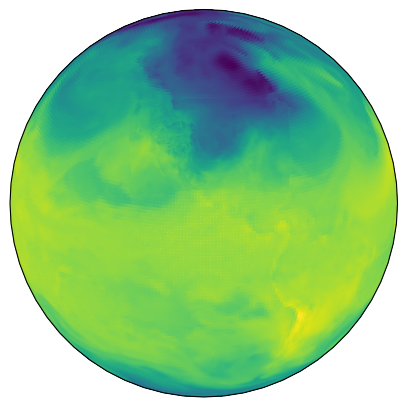

In [19]:
itime = 4
varname = "t_850"
cmap = "viridis"

fig, ax = plt.subplots(
    figsize=(5, 6.5),
    subplot_kw={"projection": ccrs.Orthographic(central_longitude=-100, central_latitude=20)},
)

vmax = None
vmin = None
for s, xds in zip(
    [5, 1/4],
    [gds, hds],
):
    idx = xds.attrs["variables"].index(varname)
    xda = xds["data"].sel(variable=idx).isel(time=itime)
    if vmax is None:
        vmax = xda.max().values
        vmin = xda.min().values
        if vmax*vmin < 0:
            vmax = np.max([np.abs(vmax), np.abs(vmin)])
            vmin = -vmax
    ax.scatter(xds.longitudes, xds.latitudes, c=xda, s=s, transform=ccrs.PlateCarree(), cmap=cmap, vmax=vmax, vmin=vmin)

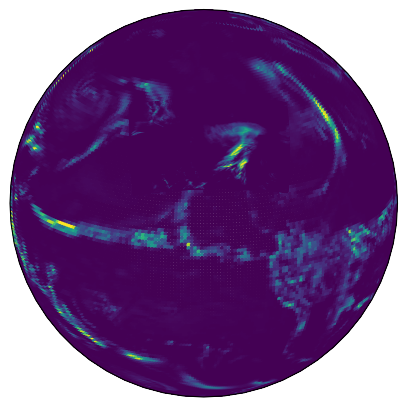

In [55]:
itime = 3
varname = "accum_tp"
cmap = "viridis"

fig, ax = plt.subplots(
    figsize=(5, 6.5),
    subplot_kw={"projection": ccrs.Orthographic(central_longitude=-100, central_latitude=20)},
)

vmax = 20
vmin = 0
for s, xds in zip(
    [5, 1/4],
    [gfds, hfds],
):
    idx = xds.attrs["variables"].index(varname)
    xda = xds["data"].sel(variable=idx).isel(time=itime)
    if vmax is None:
        vmax = xda.max().values
        vmin = xda.min().values
        if vmax*vmin < 0:
            vmax = np.max([np.abs(vmax), np.abs(vmin)])
            vmin = -vmax
    ax.scatter(xds.longitudes, xds.latitudes, c=xda, s=s, transform=ccrs.PlateCarree(), cmap=cmap, vmax=vmax, vmin=vmin)

In [61]:
hfds.attrs["variables"]

['accum_tp']

In [58]:
hds.dates.values == hfds.dates.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [59]:
gds.dates.values == gfds.dates.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [60]:
hds.dates.values == gds.dates.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])